<div style = "color: Black; 
              display: fill;
              border-radius: 20px;
              background-color: #FF0000;">
    <h1 id = "title"
        style = "padding: 13px; 
                 text-align:center;
                 color: White;
                 font-size: 40px;
                 font-weight: bold;
                 font-family: Times New Roman;">YouTube Video Analysis
    </h1>
</div>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import json

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('yt_dataset.csv')
data.head()

,id,publishedAt,channelId,title,description,channelTitle,categoryId,duration,dimension,definition,caption,viewCount,likeCount,commentCount,Trending
0,Gg-GxtjLjWs,2023-03-23T01:53:16Z,UCd_EkHbEutirFl_XSrg95kA,Refs just gave the Warriors a free bucket 🤣 #s...,"✅ SUBSCRIBE, LIKE & COMMENT!\n----\n📌 TikTok: ...",GD's Highlights,17,PT17S,2d,hd,False,75870,7801,168,0
1,FjSQkixKIbE,2023-03-20T09:00:11Z,UC_YEeUix2bvVOuLxEUw2SnQ,"Vodro Ovodro | Bangla Natok | Sabuj, Rabina, I...",Vodro Ovodro - New Natok 2023 - Vodro Ovodro N...,Eagle Drama Series,24,PT26M59S,2d,hd,False,766521,20205,365,0
2,Ewo8tt6bgZU,2023-03-22T16:59:25Z,UCXuqSBlHAE6Xw-yeJA0Tunw,I THOUGHT I Wanted This,FlexiSpot’s Global Spring Sale is on now until...,Linus Tech Tips,28,PT19M36S,2d,hd,False,879553,37365,2430,0
3,sxWa7LTRvbo,2023-03-22T16:00:30Z,UC1sELGmy5jp5fQUugmuYlXQ,SNIFFER EGG HATCHING & 10 YEAR OLD BUG GETS FI...,Minecraft Monthly returns for its second editi...,Minecraft,20,PT6M35S,2d,hd,True,350503,35101,2193,1
4,WBk4t14wG44,2023-03-20T13:30:44Z,UC-LPIU24bQXVljUXivKEeRQ,Saath Nibhaana Saathiya | साथ निभाना साथिया | ...,Click here to Subscribe *Star Plus* : https://...,StarPlus,24,PT6M11S,2d,hd,False,440395,3549,24,0


In [3]:
data.shape

(311, 15)

In [4]:
data.dtypes

id              object
publishedAt     object
channelId       object
title           object
description     object
channelTitle    object
categoryId       int64
duration        object
dimension       object
definition      object
caption           bool
viewCount       object
likeCount       object
commentCount    object
Trending         int64
dtype: object

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Top Trending Videos by Categories
    </h2>
</div>

In [5]:
main_data =pd.DataFrame(data[['title','categoryId','viewCount']])

In [6]:
with open("category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
main_data['category_name'] = main_data['categoryId'].map(cat_dict)

In [7]:
main_data['category_name'].value_counts()

Entertainment           94
News & Politics         51
Gaming                  36
Sports                  27
Music                   26
People & Blogs          20
Education               11
Comedy                  10
Film & Animation        10
Autos & Vehicles         8
Howto & Style            4
Science & Technology     3
Travel & Events          3
Movies                   3
Pets & Animals           2
Shows                    1
Name: category_name, dtype: int64

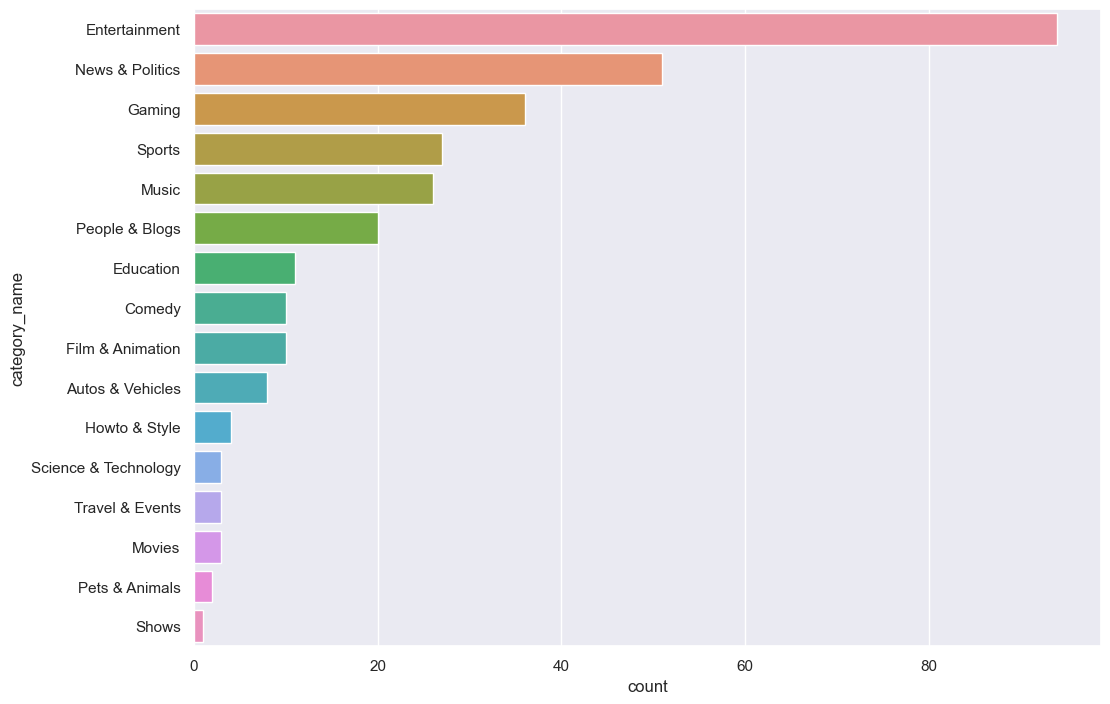

In [8]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.countplot(y = "category_name",data=main_data, order=main_data['category_name'].value_counts().index)
plt.show()

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Displaying Most Number of Posts By Hours
    </h2>
</div>

In [9]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [10]:
data = pd.read_csv('yt_dataset.csv')
data.head()

,id,publishedAt,channelId,title,description,channelTitle,categoryId,duration,dimension,definition,caption,viewCount,likeCount,commentCount,Trending
0,Gg-GxtjLjWs,2023-03-23T01:53:16Z,UCd_EkHbEutirFl_XSrg95kA,Refs just gave the Warriors a free bucket 🤣 #s...,"✅ SUBSCRIBE, LIKE & COMMENT!\n----\n📌 TikTok: ...",GD's Highlights,17,PT17S,2d,hd,False,75870,7801,168,0
1,FjSQkixKIbE,2023-03-20T09:00:11Z,UC_YEeUix2bvVOuLxEUw2SnQ,"Vodro Ovodro | Bangla Natok | Sabuj, Rabina, I...",Vodro Ovodro - New Natok 2023 - Vodro Ovodro N...,Eagle Drama Series,24,PT26M59S,2d,hd,False,766521,20205,365,0
2,Ewo8tt6bgZU,2023-03-22T16:59:25Z,UCXuqSBlHAE6Xw-yeJA0Tunw,I THOUGHT I Wanted This,FlexiSpot’s Global Spring Sale is on now until...,Linus Tech Tips,28,PT19M36S,2d,hd,False,879553,37365,2430,0
3,sxWa7LTRvbo,2023-03-22T16:00:30Z,UC1sELGmy5jp5fQUugmuYlXQ,SNIFFER EGG HATCHING & 10 YEAR OLD BUG GETS FI...,Minecraft Monthly returns for its second editi...,Minecraft,20,PT6M35S,2d,hd,True,350503,35101,2193,1
4,WBk4t14wG44,2023-03-20T13:30:44Z,UC-LPIU24bQXVljUXivKEeRQ,Saath Nibhaana Saathiya | साथ निभाना साथिया | ...,Click here to Subscribe *Star Plus* : https://...,StarPlus,24,PT6M11S,2d,hd,False,440395,3549,24,0


In [11]:
dataT=pd.DataFrame(data[['publishedAt']])

In [12]:
dataT['publishedAt'] = pd.to_datetime(dataT['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f%Z')

In [13]:
# separates date and time into two columns from 'publish_time' column
dataT.insert(1, 'publish_date', dataT['publishedAt'].dt.date)
dataT['publishedAt'] = dataT['publishedAt'].dt.time
dataT[['hour','min','sec']] = dataT['publishedAt'].astype(str).str.split(':', expand=True).astype(int)

TOP 5 Hour values
16    33
17    23
22    23
13    21
14    20
Name: hour, dtype: int64


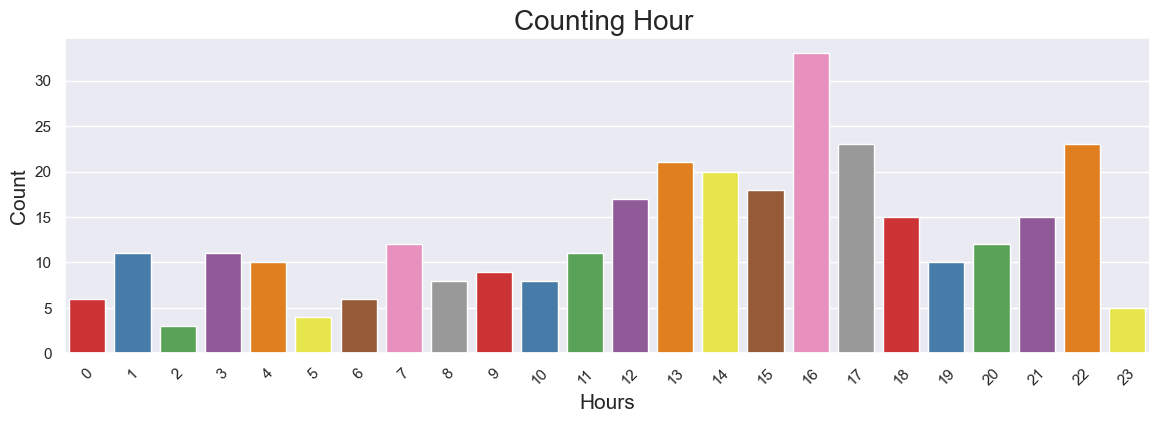

In [14]:
print("TOP 5 Hour values")
print(dataT['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sb.countplot('hour', data=dataT, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.show()

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Gini Tree with Trending videos View Count
    </h2>
</div>

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
from sklearn.tree import plot_tree


In [47]:
# remove all viewCount values with 'None'
testData =  data[data["viewCount"].str.contains("None") == False]
trendingData = pd.DataFrame(testData["Trending"])  # Response
viewCountData = pd.DataFrame(testData["viewCount"])  # Predictor


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8524590163934426

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8360655737704918



<AxesSubplot:>

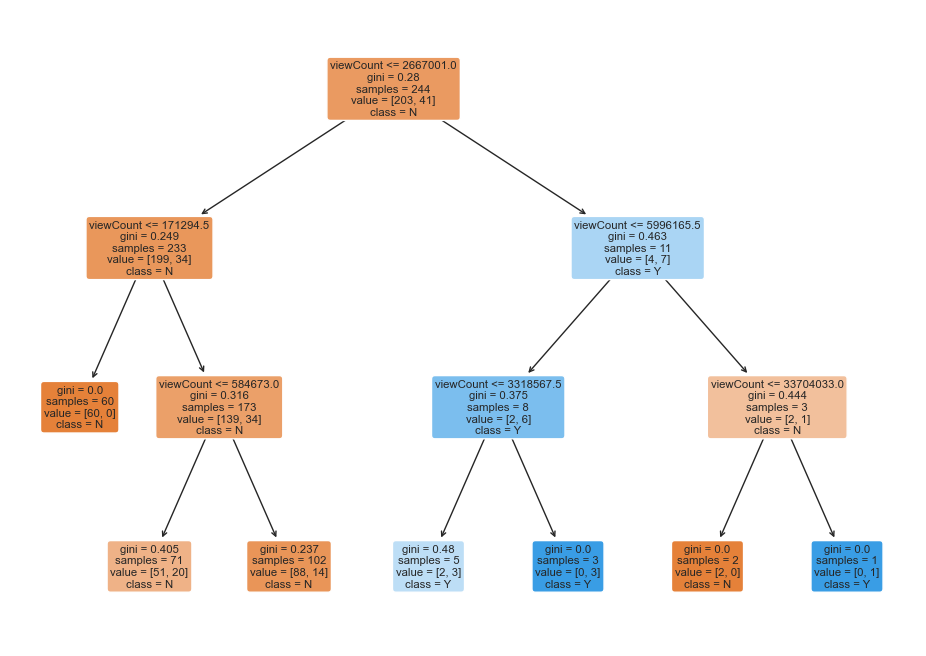

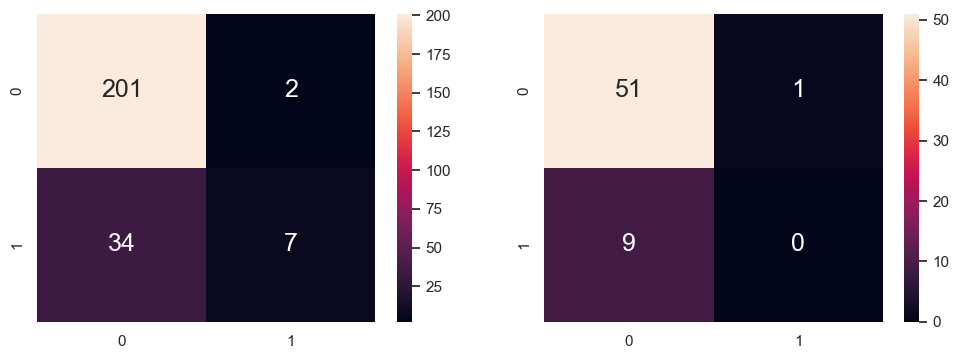

In [48]:
# Do the 80:20 thing  
X_train, X_test, y_train, y_test = train_test_split(viewCountData,trendingData,  test_size = 0.2)
    
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)  
  

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
    

# f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["viewCount"], 
          class_names=["N","Y"])

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])